# MPH Notebook
## This notebook is an example: create a copy before running it or you will get merge conflicts!
This notebook can be run to generate plots showing the median pulse heights for each FOV along with the estimated run time. Such plots allow us to examine how intensity changes throughout a run, and you should expect to see a clear decrease over time. We will then be adjusting for this in notebook `4b_normalize_image_data.ipynb`.

In [ ]:
import sys 
sys.path.append('../') 

In [ ]:
import os
import shutil
import pandas as pd
import natsort as ns

from mibi_bin_tools import bin_files
from toffy import mph_comp
from ark.utils import io_utils

### Define file parameters
You will need to define the `run_name` argument below, which will automatically assign the correct bin file and saving directories. The rest of the cells in this notebook can be run just as they are.
 * run_name: should contain the exact name of the MIBI run to locate the mph data from
 * bin_file_path: the directory containing your bin files 
 * mph_out_dir: the directory to save the MPH visualizations to (can be left as defafult)

In [ ]:
# set up directories for current run
run_name = 'YYYY-MM-DD_run_name'

bin_file_dir = os.path.join('D:\\Data', run_name)
mph_out_dir = os.path.join('C:\\Users\\Customer.ION\\Documents\\run_metrics', run_name)

# create mph_out_dir if it doesn't exist
if not os.path.exists(mph_out_dir):
    os.makedirs(mph_out_dir)

### Compute median pulse height data
The code below will compute the MPH for each FOV in the run.

In [8]:
# retrieve all the fov names from bin_file_dir
fovs = io_utils.remove_file_extensions(io_utils.list_files(bin_file_dir, substrs='.bin'))

# retrieve the total counts and compute pulse heights for each FOV run file
# saves individual .csv  files to bin_file_dir
for fov in ns.natsorted(fovs):
    if not os.path.exists(os.path.join(bin_file_dir, '%s-mph_pulse.csv' % fov)):
        print("Computing MPH for fov %s" % fov)
        mph_comp.compute_mph_metrics(bin_file_dir, bin_file_dir, fov, mass, mass_start, mass_stop)

### Visualize MPH Plots
Now, we can combine the metrics into a single `mph_pulse_combined.csv` file and then visualize the plots. The second visualization code cell will additionally produce a linear regession line. 

Note that the plot produced last will get saved as a png file in `C:\\Users\\Customer.ION\\Documents\\run_metrics\\run_name` for later reference. If you would like to ensure which version of your plot you are saving, run the corresponding cell again before closing the notebook.

In [62]:
# prior to generating the graphs, need to combine the data for each FOV into one combined .csv
# saves directly to bin_file_dir
mph_comp.combine_mph_metrics(bin_file_dir)

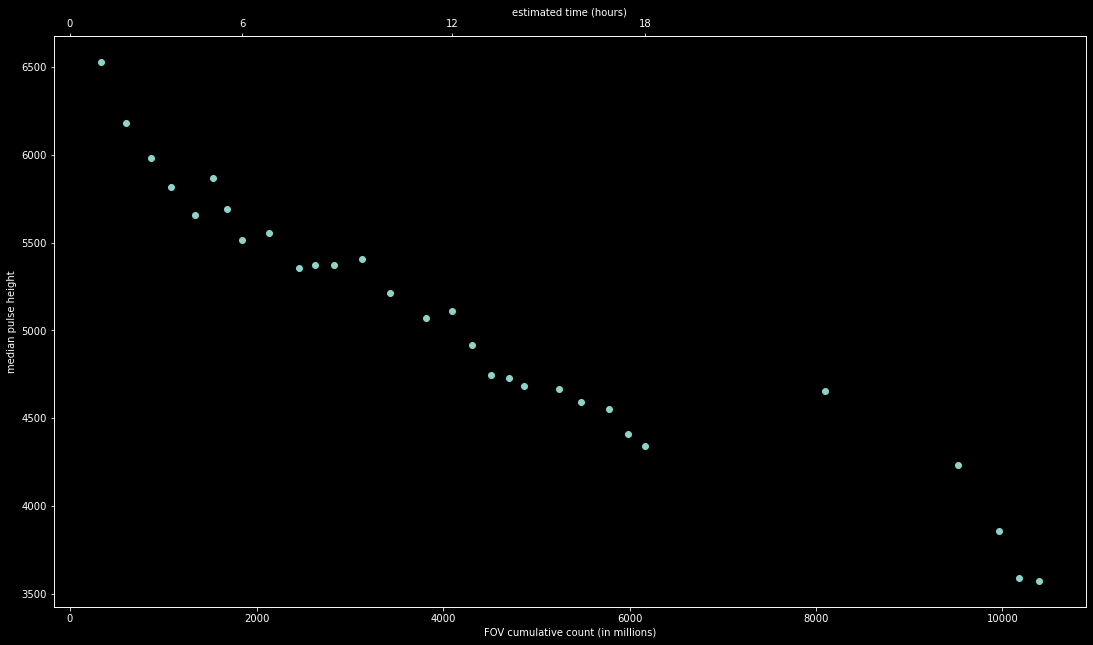

In [4]:
# visualize the median pulse heights and save plot to mph_out_dir
df_mph = pd.read_csv(os.path.join(bin_file_dir, 'mph_pulse_combined.csv'))

mph_comp.visualize_mph(df_mph, mph_out_dir)

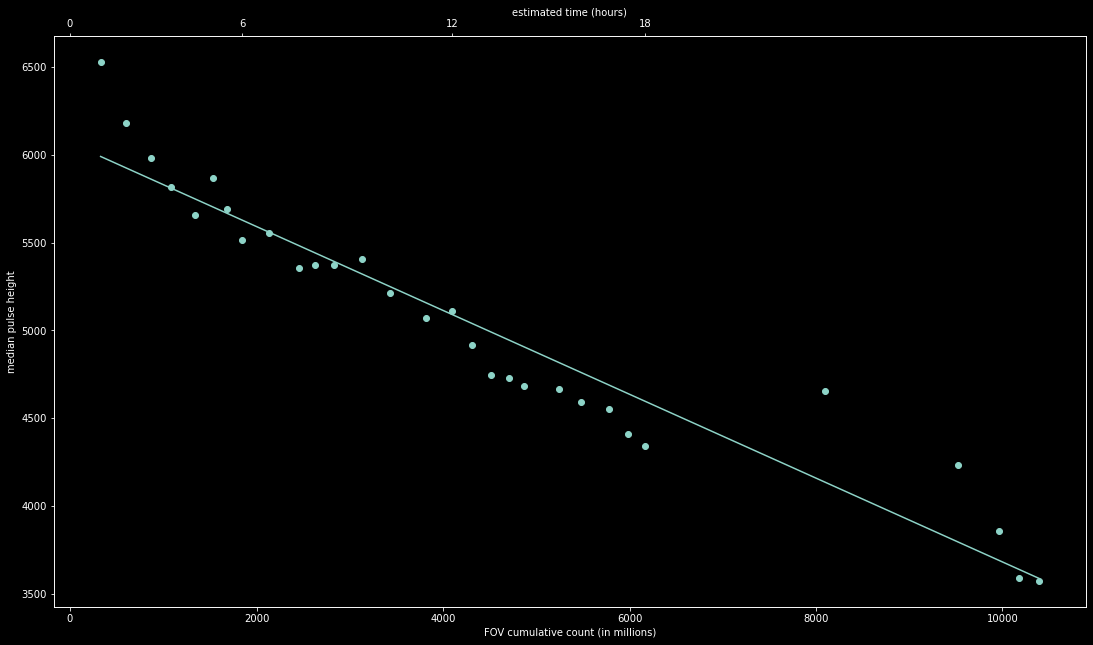

In [5]:
# plot with regression line
regression = True

mph_comp.visualize_mph(df_mph, mph_out_dir, regression)